<a href="https://colab.research.google.com/github/RaulRojas14021701/Problemas_Temas/blob/master/EDO_Sistema.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sympy
from sympy import *
sympy.init_printing()

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:

t,x0,y0,k1,k2=sympy.symbols("t,x_0,y_0,k_1,k_2")
x = sympy.Function("x")
y = sympy.Function("y")

In [4]:
ode1=x(t).diff(t)+k1*x(t)

In [5]:
ode1

          d       
k₁⋅x(t) + ──(x(t))
          dt      

In [6]:
ode2=y(t).diff(t)-k1*x(t)+k2*y(t)

In [7]:
ode2

                     d       
-k₁⋅x(t) + k₂⋅y(t) + ──(y(t))
                     dt      

In [8]:
sistema=(ode1,ode2)
sistema

⎛          d                              d       ⎞
⎜k₁⋅x(t) + ──(x(t)), -k₁⋅x(t) + k₂⋅y(t) + ──(y(t))⎟
⎝          dt                             dt      ⎠

In [9]:
dsolve(sistema)

⎡                      -k₁⋅t                               ⎤
⎢       -C₁⋅(k₁ - k₂)⋅ℯ                   -k₁⋅t       -k₂⋅t⎥
⎢x(t) = ─────────────────────, y(t) = C₁⋅ℯ      + C₂⋅ℯ     ⎥
⎣                 k₁                                       ⎦

In [10]:
soly=dsolve(sistema)
soly[1]

           -k₁⋅t       -k₂⋅t
y(t) = C₁⋅ℯ      + C₂⋅ℯ     

In [12]:
condi={x(0):x0,y(0):y0}

In [13]:
solyc=dsolve(sistema,ics=condi)
solyc

⎡                                  -k₁⋅t                        ⎤
⎢           -k₁⋅t           k₁⋅x₀⋅ℯ        ⎛ k₁⋅x₀      ⎞  -k₂⋅t⎥
⎢x(t) = x₀⋅ℯ     , y(t) = - ──────────── + ⎜─────── + y₀⎟⋅ℯ     ⎥
⎣                             k₁ - k₂      ⎝k₁ - k₂     ⎠       ⎦

In [14]:
display(solyc[0],solyc[1])

           -k₁⋅t
x(t) = x₀⋅ℯ     

                -k₁⋅t                        
         k₁⋅x₀⋅ℯ        ⎛ k₁⋅x₀      ⎞  -k₂⋅t
y(t) = - ──────────── + ⎜─────── + y₀⎟⋅ℯ     
           k₁ - k₂      ⎝k₁ - k₂     ⎠       

In [15]:
y_x = sympy.lambdify((y, k1,k2), solyc[1].rhs, 'numpy')

TypeError: ignored

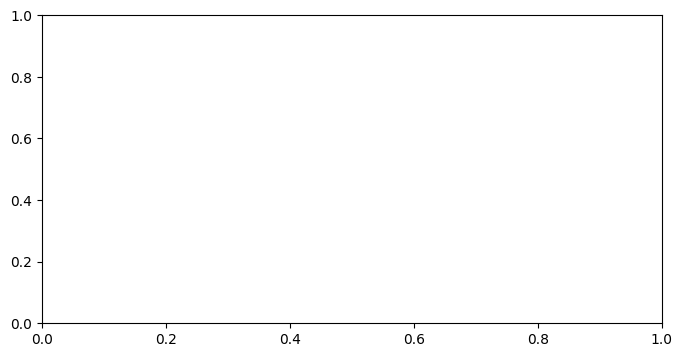

In [16]:
fig, ax = plt.subplots(figsize=(8, 4))

x = np.linspace(0, 4, 100)

for k1 in [4, 5, 6]:
    ax.plot(x, y_x(y, k1,k2), label=r"$k1=%d$" % k1)

ax.set_title(r"$%s$" % sympy.latex(solyc[1]), fontsize=18)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.legend()

fig.tight_layout()